In [1]:
# import required libries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
# define required path
raw_data = '../../data/raw/'
curated_data = '../../data/curated/'

In [2]:
conditions = pd.read_csv(curated_data + 'final_table.csv', index_col=0) 

In [3]:
del conditions['2021 rent']
del conditions['2018_income']

/tmp/ipykernel_10775/2632168585.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(conditions.corr(), annot=True, fmt='.3f')


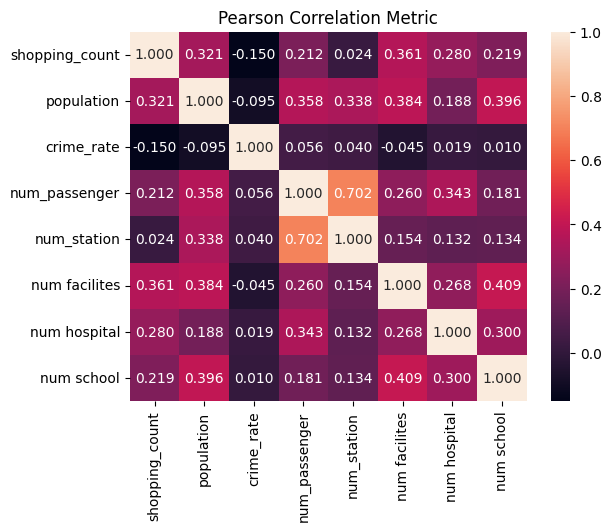

In [4]:
#delete the tips with less correlation with wait cost
# From tut02 written by Calvin and Akira
# check correlation between attributes
sns.heatmap(conditions.corr(), annot=True, fmt='.3f')

plt.title('Pearson Correlation Metric')
plt.show()

In [5]:
# discard this attribute due to the high correlation with the number of station
del conditions['num_passenger']

In [6]:
# Normalize features with max-min normalization
attributes = ['shopping_count', 'population', 'crime_rate',
              'num_station', 'num facilites', 'num hospital', 'num school']
for feature_name in attributes:
    max_value = conditions[feature_name].max()
    min_value = conditions[feature_name].min()
    conditions[feature_name] = (conditions[feature_name] - min_value) / (max_value - min_value)

In [7]:
conditions.to_csv(curated_data + 'normalized_data.csv')